In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MOCK_DATA (1).csv', index_col="Id")

In [3]:
quali = list(df["parents qualification"].unique())

In [4]:
def set_sex(x):
    if x=="Male":
        return 1
    elif x=="Female":
        return 0
    else:
        return np.random.randint(2)
    
def set_area(x):
    if x=="urban":
        return 1
    else:
        return 0

def set_parents_quali(x):
    if x==quali[0]:
        return 0
    elif x==quali[1]:
        return 1
    else:
        return 2

def set_dropout(x):
    if x==True:
        return 1
    else:
        return 0

In [5]:
df["sex"] = df["sex"].apply(set_sex)
df["urban/rural"] = df["urban/rural"].apply(set_area)
df["parents qualification"] = df["parents qualification"].apply(set_parents_quali)
df["dropout"] = df["dropout"].apply(set_dropout)

In [10]:
quali

['High school', 'illiterate', 'Graduate']

In [11]:
df

,name,sex,urban/rural,income,GPA,parents qualification,average attendance,dropout
Id,,,,,,,,
1,Helenelizabeth,0,0,114586,3.8,0,81,1
2,Othella,0,0,7449,1.9,1,56,0
3,Sheryl,0,1,23284,3.3,1,25,0
4,Karim,1,0,212267,8.8,2,24,1
5,Lanny,0,1,585328,7.1,2,20,0
...,...,...,...,...,...,...,...,...
996,Paulie,1,1,921977,8.7,2,16,0
997,Yancey,1,0,734661,2.5,0,70,0
998,Marylee,0,0,240330,9.9,0,96,1


In [12]:
one_hot_encoded = pd.get_dummies(df['parents qualification'], prefix='', drop_first=True)

df = pd.concat([df, one_hot_encoded], axis=1)
df = df.drop('parents qualification', axis=1)

In [13]:
df

,name,sex,urban/rural,income,GPA,average attendance,dropout,_1,_2
Id,,,,,,,,,
1,Helenelizabeth,0,0,114586,3.8,81,1,0,0
2,Othella,0,0,7449,1.9,56,0,1,0
3,Sheryl,0,1,23284,3.3,25,0,1,0
4,Karim,1,0,212267,8.8,24,1,0,1
5,Lanny,0,1,585328,7.1,20,0,0,1
...,...,...,...,...,...,...,...,...,...
996,Paulie,1,1,921977,8.7,16,0,0,1
997,Yancey,1,0,734661,2.5,70,0,0,0
998,Marylee,0,0,240330,9.9,96,1,0,0


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['sex', 'urban/rural', 'income', 'GPA', 'average attendance', '_1', '_2']]
y = df['dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.45


In [15]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3)  # You may adjust max_depth
tree_model.fit(X_train, y_train)


tree_predictions = tree_model.predict(X_test)


tree_accuracy = accuracy_score(y_test, tree_predictions)
print("Decision Tree Accuracy:", tree_accuracy)


Decision Tree Accuracy: 0.465


In [16]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100)
forest_model.fit(X_train, y_train)

forest_predictions = forest_model.predict(X_test)

forest_accuracy = accuracy_score(y_test, forest_predictions)
print("Random Forest Accuracy:", forest_accuracy)

Random Forest Accuracy: 0.495


In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# ... (same data preparation steps as above)

# SVM requires feature scaling
svm_model = make_pipeline(StandardScaler(), SVC())
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.49


In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# ... (same data preparation steps as above)

# Neural Networks also benefit from feature scaling
nn_model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100,)))
nn_model.fit(X_train, y_train)

# Make predictions
nn_predictions = nn_model.predict(X_test)

# Evaluate the model
nn_accuracy = accuracy_score(y_test, nn_predictions)
print("Neural Network Accuracy:", nn_accuracy)


Neural Network Accuracy: 0.5


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
df.columns

Index(['name', 'sex', 'urban/rural', 'income', 'GPA', 'average attendance',
       'dropout', '_1', '_2'],
      dtype='object')

In [20]:
generated_data = pd.read_csv("student_dropout_data.csv", index_col='id')
generated_data

,name,sex,urban/rural,income,GPA,average attendance,Parents Qualification,is dropout?
id,,,,,,,,
1,Student_1,Male,Rural,High,3.984316,80.387606,Low,Yes
2,Student_2,Female,Urban,Medium,3.702850,64.765074,Low,Yes
3,Student_3,Male,Urban,High,2.417021,56.830045,Low,Yes
4,Student_4,Male,Urban,Low,3.861190,82.581988,Low,Yes
5,Student_5,Male,Urban,Low,2.232733,86.929873,Low,Yes
...,...,...,...,...,...,...,...,...
996,Student_996,Male,Urban,Medium,3.314707,95.530286,Medium,Yes
997,Student_997,Male,Rural,High,2.944564,75.492700,High,Yes
998,Student_998,Female,Urban,Medium,3.760313,75.063782,High,No


In [21]:
cols_to_encode = ["sex", "urban/rural", "income", "Parents Qualification", "is dropout?"]

In [22]:
df_encoded = pd.get_dummies(generated_data, columns=cols_to_encode, drop_first=True)

In [23]:
df_encoded

,name,GPA,average attendance,sex_Male,urban/rural_Urban,income_Low,income_Medium,Parents Qualification_Low,Parents Qualification_Medium,is dropout?_Yes
id,,,,,,,,,,
1,Student_1,3.984316,80.387606,1,0,0,0,1,0,1
2,Student_2,3.702850,64.765074,0,1,0,1,1,0,1
3,Student_3,2.417021,56.830045,1,1,0,0,1,0,1
4,Student_4,3.861190,82.581988,1,1,1,0,1,0,1
5,Student_5,2.232733,86.929873,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
996,Student_996,3.314707,95.530286,1,1,0,1,0,1,1
997,Student_997,2.944564,75.492700,1,0,0,0,0,0,1
998,Student_998,3.760313,75.063782,0,1,0,1,0,0,0


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_encoded[["GPA", "average attendance"]]= scaler.fit_transform(df_encoded[["GPA", "average attendance"]])

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_encoded.drop(columns=["name", "is dropout?_Yes"])
y = df_encoded['is dropout?_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.96


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

cm = confusion_matrix(y_test, predictions)
cm

array([[  2,   8],
       [  0, 190]], dtype=int64)

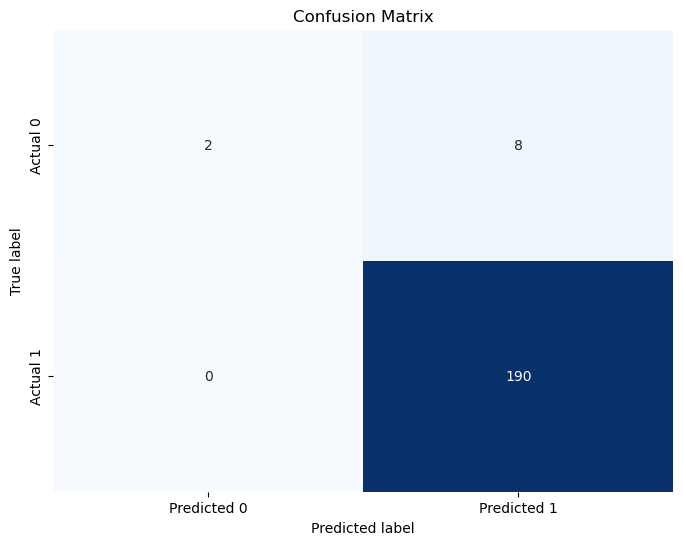

In [27]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.96      1.00      0.98       190

    accuracy                           0.96       200
   macro avg       0.98      0.60      0.66       200
weighted avg       0.96      0.96      0.95       200



In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled)


# Logistic Regression Model

In [30]:

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.9657894736842105


In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       190
           1       1.00      0.93      0.96       190

    accuracy                           0.97       380
   macro avg       0.97      0.97      0.97       380
weighted avg       0.97      0.97      0.97       380



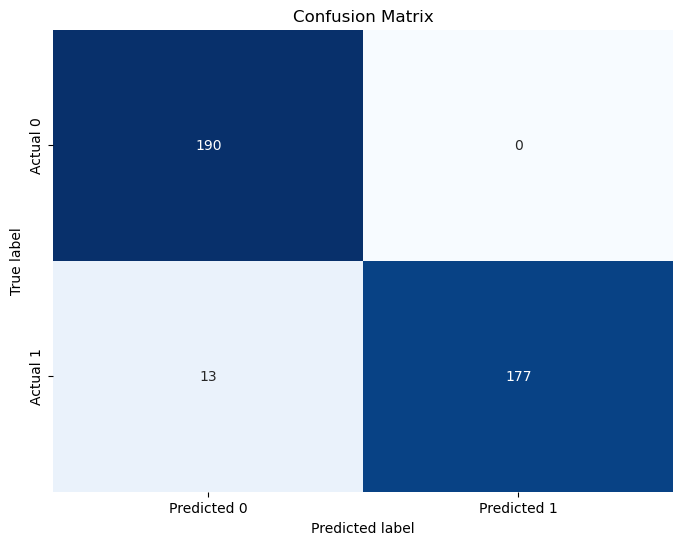

In [32]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [33]:
tree_model = DecisionTreeClassifier(max_depth=3)  # You may adjust max_depth
tree_model.fit(X_train, y_train)

# Make predictions
tree_predictions = tree_model.predict(X_test)

print(classification_report(y_test, tree_predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       190
           1       0.99      0.92      0.95       190

    accuracy                           0.96       380
   macro avg       0.96      0.96      0.96       380
weighted avg       0.96      0.96      0.96       380



In [34]:
forest_model = RandomForestClassifier(n_estimators=100)  # You may adjust n_estimators
forest_model.fit(X_train, y_train)

# Make predictions
forest_predictions = forest_model.predict(X_test)


print(classification_report(y_test, forest_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       190

    accuracy                           1.00       380
   macro avg       1.00      1.00      1.00       380
weighted avg       1.00      1.00      1.00       380



In [35]:
forest_model.predict_proba([[1, 1, 1, 0, 1, 0, 1, 0]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [36]:
forest_model.feature_importances_

array([0.3068922 , 0.24158246, 0.01208942, 0.05418598, 0.0276212 ,
       0.02640302, 0.17675483, 0.15447089])

In [37]:
forest_model.predict_proba([X_test.iloc[2]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.82, 0.18]])

In [38]:
pd.concat([X_test, y_test], axis=1)

,GPA,average attendance,sex_Male,urban/rural_Urban,income_Low,income_Medium,Parents Qualification_Low,Parents Qualification_Medium,is dropout?_Yes
1226,0.864061,0.731385,0,0,0,0,0,0,0
1865,0.532836,0.849664,1,1,1,0,0,0,0
1520,0.622290,0.713162,0,0,0,0,0,0,0
1374,0.952417,0.691456,0,1,1,0,0,0,0
1866,0.801581,0.731780,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1623,0.708119,0.703651,0,1,0,1,0,0,0
201,0.938931,0.580341,0,0,0,1,0,0,1
1099,0.741439,0.934768,1,1,1,0,0,0,0
1067,0.747576,0.938752,1,1,0,0,0,0,0


In [39]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import layers, Sequential

In [40]:
model = Sequential([
    layers.InputLayer(input_shape=(8,)),
    layers.Dense(units=10, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [42]:
model.fit(X_train, y_train, epochs=25, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/25
31/31 [==============================] - 2s 18ms/step - loss: 0.6917 - accuracy: 0.5507 - val_loss: 0.6375 - val_accuracy: 0.6579
Epoch 2/25
31/31 [==============================] - 0s 5ms/step - loss: 0.6340 - accuracy: 0.6592 - val_loss: 0.5942 - val_accuracy: 0.8000
Epoch 3/25
31/31 [==============================] - 0s 5ms/step - loss: 0.5882 - accuracy: 0.7901 - val_loss: 0.5547 - val_accuracy: 0.8632
Epoch 4/25
31/31 [==============================] - 0s 5ms/step - loss: 0.5464 - accuracy: 0.8434 - val_loss: 0.5157 - val_accuracy: 0.8632
Epoch 5/25
31/31 [==============================] - 0s 5ms/step - loss: 0.5060 - accuracy: 0.8724 - val_loss: 0.4772 - val_accuracy: 0.8789
Epoch 6/25
31/31 [==============================] - 0s 6ms/step - loss: 0.4668 - accuracy: 0.8796 - val_loss: 0.4408 - val_accuracy: 0.9000
Epoch 7/25
31/31 [==============================] - 0s 5ms/step - loss: 0.4315 - accuracy: 0.8987 - val_loss: 0.4074 - val_accuracy: 0.8947
Epoch 8/25
31/31 [=

In [43]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 0.9158


[0.2190036028623581, 0.9157894849777222]

In [44]:
predict = model.predict(X_test)
def get_ans(x):
    if x[0]>=0.5:
        return 1
    else:
        return 0
predict = list(map(get_ans, predict))

6/6 [==============================] - 0s 3ms/step


In [45]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        94
           1       1.00      0.83      0.91        96

    accuracy                           0.92       190
   macro avg       0.93      0.92      0.92       190
weighted avg       0.93      0.92      0.92       190



In [46]:
model_rnn = Sequential()
model_rnn.add(layers.LSTM(64, input_shape=(1,8), activation='relu')),
model_rnn.add(layers.Dense(10, activation='relu'))
model_rnn.add(layers.Dense(1, activation='sigmoid'))
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
new_X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
new_X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])
new_X_val = np.array(X_val).reshape(X_val.shape[0], 1, X_val.shape[1])

In [48]:
model_rnn.fit(new_X_train, y_train, epochs=10, batch_size=50, validation_data=(new_X_val, y_val))

Epoch 1/10
31/31 [==============================] - 5s 30ms/step - loss: 0.6841 - accuracy: 0.6967 - val_loss: 0.6681 - val_accuracy: 0.9316
Epoch 2/10
31/31 [==============================] - 0s 8ms/step - loss: 0.6433 - accuracy: 0.9382 - val_loss: 0.6047 - val_accuracy: 0.9526
Epoch 3/10
31/31 [==============================] - 0s 7ms/step - loss: 0.5479 - accuracy: 0.9270 - val_loss: 0.4712 - val_accuracy: 0.9474
Epoch 4/10
31/31 [==============================] - 0s 7ms/step - loss: 0.3935 - accuracy: 0.9217 - val_loss: 0.3091 - val_accuracy: 0.9421
Epoch 5/10
31/31 [==============================] - 0s 7ms/step - loss: 0.2638 - accuracy: 0.9224 - val_loss: 0.2138 - val_accuracy: 0.9474
Epoch 6/10
31/31 [==============================] - 0s 7ms/step - loss: 0.1973 - accuracy: 0.9388 - val_loss: 0.1686 - val_accuracy: 0.9474
Epoch 7/10
31/31 [==============================] - 0s 7ms/step - loss: 0.1637 - accuracy: 0.9441 - val_loss: 0.1441 - val_accuracy: 0.9579
Epoch 8/10
31/31 [=

In [49]:
predict = model_rnn.predict(new_X_test)
def get_ans(x):
    if x[0]>=0.5:
        return 1
    else:
        return 0
predict = list(map(get_ans, predict))

6/6 [==============================] - 0s 3ms/step


In [50]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        94
           1       0.99      0.93      0.96        96

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190

